#MNIST with tf.keras


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

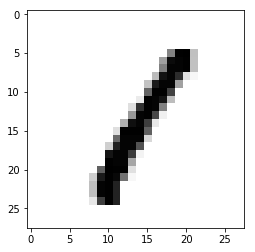

1


In [0]:
#plotting the first row

plt.imshow(x_train[3], cmap = plt.cm.binary)
plt.show()
print(y_train[3])

In [0]:
print(x_train[3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

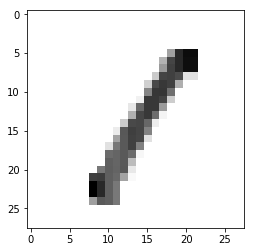

In [0]:
plt.imshow(x_train[3], cmap = plt.cm.binary)
plt.show()

In [0]:
print(x_train[3])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
print(x_train.shape)

(60000, 28, 28)


##Defining model

In [0]:
model = tf.keras.Sequential()

#Create 4 layers: input layer which is flattened contains 784 nodes, 2 hidden layers with 128 nodes, output layer with 10 nodes
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

##Compiling Model

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

##Training the model

In [0]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2667 - acc: 0.9225
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1108 - acc: 0.9656
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0749 - acc: 0.9761
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0556 - acc: 0.9820
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0416 - acc: 0.9865


##Testing the model

In [0]:
loss_val, accuracy_val = model.evaluate(x_test, y_test)
print('Loss is ',loss_val)
print('Accuracy is ',accuracy_val)


10000/10000 [==============================] - 0s 37us/sample - loss: 0.0851 - acc: 0.9738
Loss is  0.08514685014653951
Accuracy is  0.9738


##Predicting

In [0]:
predictions = model.predict([x_test])
predictions

array([[1.41449918e-09, 2.95040392e-09, 6.87018030e-07, ...,
        9.99989748e-01, 5.59049838e-08, 6.18287629e-07],
       [5.09475552e-11, 4.21386801e-07, 9.99999523e-01, ...,
        3.73383355e-12, 5.03815256e-09, 3.14992932e-12],
       [4.19372009e-10, 9.99949932e-01, 1.58730543e-07, ...,
        3.25677465e-05, 2.17478168e-06, 1.14879946e-07],
       ...,
       [7.47235693e-12, 7.24147355e-07, 1.37221008e-08, ...,
        4.48227752e-07, 5.63680999e-07, 2.59988315e-06],
       [9.13634631e-06, 1.38251490e-08, 8.67683703e-10, ...,
        1.05188285e-07, 1.14023627e-04, 5.40996261e-08],
       [3.87044281e-08, 1.00736419e-09, 8.66248351e-10, ...,
        3.91167099e-11, 1.46609494e-07, 2.64591972e-12]], dtype=float32)

In [0]:
print(predictions.shape)
print(predictions[0])

#predictions is a 2d array. Each row contains 10 values which contain the probablility corresponding to each digit

(10000, 10)
[1.4144992e-09 2.9504039e-09 6.8701803e-07 8.8588213e-06 2.6410905e-09
 5.8402123e-09 6.7818845e-14 9.9998975e-01 5.5904984e-08 6.1828763e-07]


In [0]:
# argmax will give the max value in that particular row
prediction = np.argmax(predictions[10])
print(prediction)


0


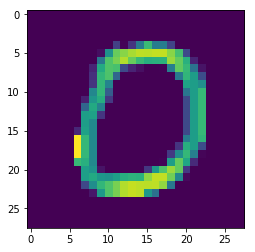

In [0]:
plt.imshow(x_test[10])

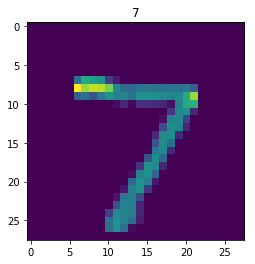

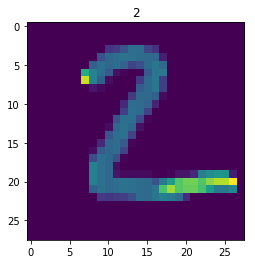

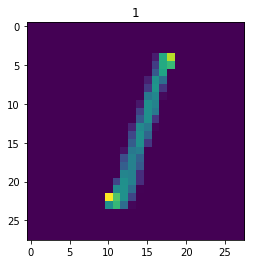

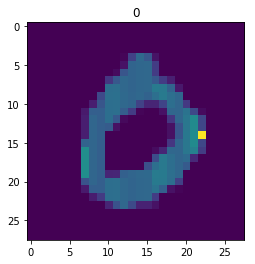

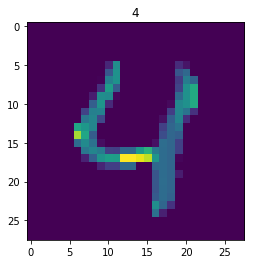

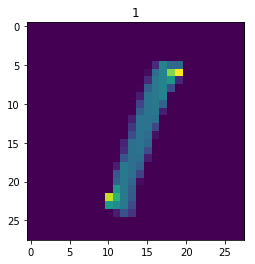

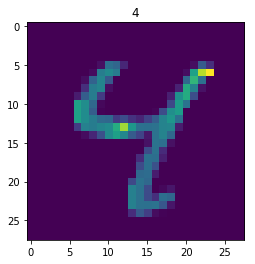

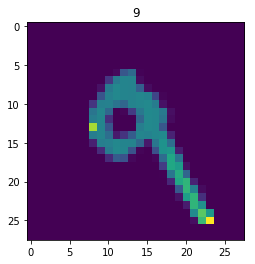

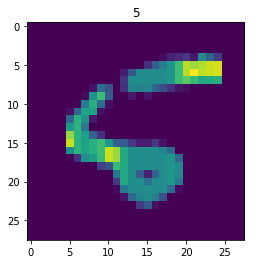

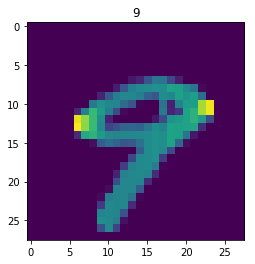

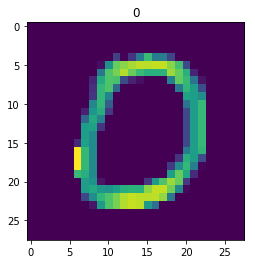

In [0]:
for i in range(11):
  prediction = np.argmax(predictions[i])
#   print(prediction)
  plt.figure()
  plt.title(prediction)
  plt.imshow(x_test[i])

plt.show()